# Getting your data into Python

This chapter is about interacting with data on your computer's disk --
mostly loading it into Python, but also writing it back, and storing it
for quick reloading later.

# Plain text files

A **plain text** file is a file where every single bit contributes
towards representing plain text content. What fits into the concept of
'plain text' is actually surprisingly fuzzy -- it depends on which
characters are available in the character set you're using, and
character sets are just arbitrary human conventions. Historically,
there were computer systems that didn't make case distinctions, so upper
vs. lower case was not something you could express using just plain
text.

Nowadays, Unicode is making inroads into text properties which were
previously the domain of **rich text**, assigning dedicated codepoints
to 𝘪𝘵𝘢𝘭𝘪𝘤𝘴 or ˢᵘᵖᵉʳˢᶜʳᶦᵖᵗ, which allow you, among other things, to work
around the lack of rich text capabilities in Twitter or Facebook posts
(although that's obviously not what they were originally intended for).
But the further you go along the axis of content vs. appearance, the
more you encounter properties which are unlikely to ever make it into
plain text, like the ability to specify which particular font the text
should be displayed with.

In [1]:
from unicodedata import name

for char in "𝘪𝘵𝘢𝘭𝘪𝘤𝘴ˢᵘᵖᵉʳˢᶜʳᶦᵖᵗ":
    print(char, name(char), sep="\t")

𝘪	MATHEMATICAL SANS-SERIF ITALIC SMALL I
𝘵	MATHEMATICAL SANS-SERIF ITALIC SMALL T
𝘢	MATHEMATICAL SANS-SERIF ITALIC SMALL A
𝘭	MATHEMATICAL SANS-SERIF ITALIC SMALL L
𝘪	MATHEMATICAL SANS-SERIF ITALIC SMALL I
𝘤	MATHEMATICAL SANS-SERIF ITALIC SMALL C
𝘴	MATHEMATICAL SANS-SERIF ITALIC SMALL S
ˢ	MODIFIER LETTER SMALL S
ᵘ	MODIFIER LETTER SMALL U
ᵖ	MODIFIER LETTER SMALL P
ᵉ	MODIFIER LETTER SMALL E
ʳ	MODIFIER LETTER SMALL R
ˢ	MODIFIER LETTER SMALL S
ᶜ	MODIFIER LETTER SMALL C
ʳ	MODIFIER LETTER SMALL R
ᶦ	MODIFIER LETTER SMALL CAPITAL I
ᵖ	MODIFIER LETTER SMALL P
ᵗ	MODIFIER LETTER SMALL T


Plain text files can be opened with the built-in `open()` function. As
we've seen in our discussion of [Unicode](unicode), your safest bet with
a plain text file in an unknown encoding is to start by trying to open
it as `UTF-8` -- not because that will always work, but precisely
because it won't: if it's not actually `UTF-8`, you're likely to get an
error, which will tell you there's something fishy and prevent you from
corrupting your data. Also, `UTF-8` is becoming more and more prevalent,
so chances are good that file actually *is* `UTF-8`, in which case
you're golden. The `text.txt` file below, though, isn't.

In [2]:
with open("data/text.txt", encoding="utf-8") as file:
    print(file.read())

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 1-2: invalid continuation byte

OK, that didn't work. Now you can start thinking about alternatives. Do
you know anything about the language the text in the file is supposed to
be in? If it's a Western European language, then the encoding might be
[`latin1`](https://en.wikipedia.org/wiki/ISO/IEC_8859-1) or
[`cp1252`](https://en.wikipedia.org/wiki/Windows-1252); if it's Central
European, then perhaps
[`latin2`](https://en.wikipedia.org/wiki/ISO/IEC_8859-2) or
[`cp1250`](https://en.wikipedia.org/wiki/Windows-1250) (beyond those
two regions, I'm afraid I can't give any tips, you'll have to rely on
web search engines).

Let's say we know `text.txt` is in Czech, a Central European
language. We might want to try `cp1250`, because that's *still* (ugh)
the default encoding for text files created under the Czech version of
Windows, and that's where the file might have come from.

In [3]:
with open("data/text.txt", encoding="cp1250") as file:
    print(file.read())

Běľela Magda kaňonem, sráľela banány rádiem.
Helenka líbala na kolínko robustního cestáře France.
Pan čáp ztratil čepičku, měla barvu barvičku...?



The tricky thing here is that everything went seemingly fine, no error
occurred. That's because `cp1250` is an 8-bit fixed-width encoding, and
any sequence of bytes can be interpreted as a `cp1250`-encoded file --
even if it was originally intended to be something else. If a Czech
speaker tries to read this output, some words will be off. It may be
hard to spot them, because many 8-bit encodings share a lot of the
byte--character mappings, at least in the ASCII range [0; 128), but to a
smaller extent even beyond. This makes it easier to still read at least
parts of the file if you've guessed the encoding wrong, but it also
makes it harder to realize that.

The 1990s were the age of many different 8-bit encodings for different
groups of languages. It sucked. Be glad you live in the age of `UTF-8`.

Finally, if we try `latin2`, that Czech person helpfully standing behind
you can tell you that now, the result looks alright. If you compare with
the previous attempt, you may see that there are indeed minute
differences.

In [4]:
with open("data/text.txt", encoding="latin2") as file:
    print(file.read())

Běžela Magda kaňonem, srážela banány rádiem.
Helenka líbala na kolínko robustního cestáře France.
Pan čáp ztratil čepičku, měla barvu barvičku...?



Sometimes, you may encounter a plain text file that you know should be
in `UTF-8`, but it has become corrupted for some reason -- maybe it was
spliced together with another file in a different encoding, or maybe
some evil spirit flipped a few bits here and there. In that case, the
contents won't look right in any one encoding, but you might still want
to at least have a glimpse at what it contains. To make Python soldier
through in spite of encountering invalid byte sequences (i.e. encoding
errors), you can specify an error handler. A preview of a few of the
more common options is given below; for a full list, refer
[here](https://docs.python.org/3/library/codecs.html#error-handlers).

In [5]:
with open("data/text.txt", encoding="utf-8", errors="replace") as file:
    print(file.read())

B�ela Magda ka�onem, sr�ela ban�ny r�diem.
Helenka l�bala na kol�nko robustn�ho cest��e France.
Pan ��p ztratil �epi�ku, m�la barvu barvi�ku...?



In [6]:
with open("data/text.txt", encoding="utf-8", errors="ignore") as file:
    print(file.read())

Bela Magda kaonem, srela banny rdiem.
Helenka lbala na kolnko robustnho ceste France.
Pan p ztratil epiku, mla barvu barviku...?



In [7]:
with open("data/text.txt", encoding="utf-8", errors="backslashreplace") as file:
    print(file.read())

B\xec\xbeela Magda ka\xf2onem, sr\xe1\xbeela ban\xe1ny r\xe1diem.
Helenka l\xedbala na kol\xednko robustn\xedho cest\xe1\xf8e France.
Pan \xe8\xe1p ztratil \xe8epi\xe8ku, m\xecla barvu barvi\xe8ku...?



Incidentally, this allows us to take a peek at what a rich text file
looks like under the hood. If you open `text.doc` in a word processor,
you'll see that it has the same textual content as `text.txt`. But
opening it as plain text, we see that the file definitely contains some
more stuff besides that, and most of it can't be interpreted as text --
there's a lot of those question mark replacement characters, and even
more null bytes (`\x00`, i.e. a byte consisting of all 0's). Some of it
is metadata, e.g. who wrote the text and when, or possibly encoding
information, so that the word processor doesn't have to take blind
guesses at which encoding the text is stored in like we just had to.

In [8]:
with open("data/text.doc", encoding="utf-8", errors="replace") as file:
    txt = file.read()
txt[:10]

'��\x11\u0871\x1a�\x00\x00\x00\x00'

In [9]:
# this is probably author metadata?
index = txt.find("Lukeš")
txt[index-2:index+15]

'\x00\x00Lukeš, David\x00\x00\x00'

In [10]:
# and this is probably the part which corresponds to "Magda kaňonem" in
# our plain text file
index = txt.find("M")
txt[index:index+25]

'M\x00a\x00g\x00d\x00a\x00 \x00k\x00a\x00H\x01o\x00n\x00e\x00m'

# Manipulating tabular data


CSVs are actually plain text files -- in their simplest form, each row
of the table is just a line of text, with columns separated by commas.
However, in order to allow the individual fields to contain commas or
newlines (which normally act as column and row separators), the CSV
standard defines fairly complicated escaping mechanisms which you don't
want to implement yourself. So it's generally better to rely on a
library to parse CSVs and not do it manually, unless you know for a fact
that the CSV contains none of these gotchas.


Data often comes in tabular format -- Excel files, CSV files and the
like. The easiest and most convenient way to load this type of data into
Python and manipulate it is using the
[`pandas`](https://pandas.pydata.org/) library. While manual
modifications of individual cells will probably always be more ergonomic
in a spreadsheet editor like Excel, any kind of mass data manipulation
is what `pandas`... excels at, if you'll pardon the pun. It does so in a
clean and efficient way, mostly without even breaking a sweat, and best
of all, you can always retrace your steps and check whether you've made
a mistake at some point because you're writing them down as Python
commands instead of clicking around in a graphical user interface. Not
to mention that this makes it trivial to apply the same series of
processing steps to similarly shaped data, once you've figured them out.

## The `pandas` library

Let's fire up `pandas` and take a look at how it can help you to slice
and dice tables in Python. Or should I say `DataFrame`s, because that's
what `pandas` calls them, acknowledging inspiration from R's trademark
data structure.

In [11]:
import pandas as pd

In [12]:
df = pd.read_excel("data/concordance_corpus.xlsx")

In [13]:
type(df)

pandas.core.frame.DataFrame

In [14]:
df

,newadvent.org,"by Theodor Mommsen , undertook its monumental publication , the",Corpus/Corpus/NP,"Inscriptionum Latinarum "" , it sent a flattering letter to"
0,newadvent.org,Mommsen . The latter 's numerous collaborators...,Corpus/Corpus/NP,""" , among them Edwin Bormann , the noted autho..."
1,newadvent.org,") , concerning the preparatory work for the ab...",Corpus/Corpus/NP,"Inscriptionum "" , which appeared in the monthl..."
2,freerepublic.com,", or arrest the MD assembly , or suspend habeus",corpus/corpus/NN,", or invade sovereign states . ​He​ ​did​ ​n't..."
3,hinduism.co.za,"corporeal being in the fullness of time , assu...",corpus/corpus/NN,. It arises and perishes in due order . And
4,lg-legal.com,relation to the takeover offer announced today...,Corpora/corpus/NNS,valuing Archipelago at £ 340 m. 27 Sep 2013 MORE
...,...,...,...,...
848,blogs.ulster.ac.uk,"University . For example , Corpus Christi Coll...",Corpus/Corpus/NP,"Irish Missal , 12 th century ( MS 282 )"
849,ginnysaustin.com,set by a youth cutting my teeth on tacos in,Corpus/Corpus/NP,"Christi ( RIP Elva ’s ) . Now , I"
850,patriotsquestion911.com,"of the Geneva Conventions , and the repeal of ...",corpus/corpus/NN,( a fundamental point of law that has been with
851,biblicalarchaeology.org,"Keel recently pointed out , even in the highly...",Corpus/Corpus/NP,of West Semitic Stamp Seals published by Nahma...


<!-- TODO: Whew, preview long and unwieldy, let's use the `.head()` method -->
<!-- from now on to condense it a little bit. -->

In [15]:
pd.read_excel(
    "data/concordance_corpus.xlsx",
    header=None
)

,0,1,2,3
0,newadvent.org,"by Theodor Mommsen , undertook its monumental ...",Corpus/Corpus/NP,"Inscriptionum Latinarum "" , it sent a flatteri..."
1,newadvent.org,Mommsen . The latter 's numerous collaborators...,Corpus/Corpus/NP,""" , among them Edwin Bormann , the noted autho..."
2,newadvent.org,") , concerning the preparatory work for the ab...",Corpus/Corpus/NP,"Inscriptionum "" , which appeared in the monthl..."
3,freerepublic.com,", or arrest the MD assembly , or suspend habeus",corpus/corpus/NN,", or invade sovereign states . ​He​ ​did​ ​n't..."
4,hinduism.co.za,"corporeal being in the fullness of time , assu...",corpus/corpus/NN,. It arises and perishes in due order . And
...,...,...,...,...
849,blogs.ulster.ac.uk,"University . For example , Corpus Christi Coll...",Corpus/Corpus/NP,"Irish Missal , 12 th century ( MS 282 )"
850,ginnysaustin.com,set by a youth cutting my teeth on tacos in,Corpus/Corpus/NP,"Christi ( RIP Elva ’s ) . Now , I"
851,patriotsquestion911.com,"of the Geneva Conventions , and the repeal of ...",corpus/corpus/NN,( a fundamental point of law that has been with
852,biblicalarchaeology.org,"Keel recently pointed out , even in the highly...",Corpus/Corpus/NP,of West Semitic Stamp Seals published by Nahma...


In [16]:
pd.read_excel?

In [17]:
df = pd.read_excel(
    "data/concordance_corpus.xlsx",
    header=None,
    names=["domain", "left", "kwic", "right"]
)
df

,domain,left,kwic,right
0,newadvent.org,"by Theodor Mommsen , undertook its monumental ...",Corpus/Corpus/NP,"Inscriptionum Latinarum "" , it sent a flatteri..."
1,newadvent.org,Mommsen . The latter 's numerous collaborators...,Corpus/Corpus/NP,""" , among them Edwin Bormann , the noted autho..."
2,newadvent.org,") , concerning the preparatory work for the ab...",Corpus/Corpus/NP,"Inscriptionum "" , which appeared in the monthl..."
3,freerepublic.com,", or arrest the MD assembly , or suspend habeus",corpus/corpus/NN,", or invade sovereign states . ​He​ ​did​ ​n't..."
4,hinduism.co.za,"corporeal being in the fullness of time , assu...",corpus/corpus/NN,. It arises and perishes in due order . And
...,...,...,...,...
849,blogs.ulster.ac.uk,"University . For example , Corpus Christi Coll...",Corpus/Corpus/NP,"Irish Missal , 12 th century ( MS 282 )"
850,ginnysaustin.com,set by a youth cutting my teeth on tacos in,Corpus/Corpus/NP,"Christi ( RIP Elva ’s ) . Now , I"
851,patriotsquestion911.com,"of the Geneva Conventions , and the repeal of ...",corpus/corpus/NN,( a fundamental point of law that has been with
852,biblicalarchaeology.org,"Keel recently pointed out , even in the highly...",Corpus/Corpus/NP,of West Semitic Stamp Seals published by Nahma...


In [18]:
df["domain"]

0                newadvent.org
1                newadvent.org
2                newadvent.org
3             freerepublic.com
4               hinduism.co.za
                ...           
849         blogs.ulster.ac.uk
850           ginnysaustin.com
851    patriotsquestion911.com
852    biblicalarchaeology.org
853        rrojasdatabank.info
Name: domain, Length: 854, dtype: object

In [19]:
len(set(df["domain"]))

234

In [20]:
df[["domain", "kwic"]]

,domain,kwic
0,newadvent.org,Corpus/Corpus/NP
1,newadvent.org,Corpus/Corpus/NP
2,newadvent.org,Corpus/Corpus/NP
3,freerepublic.com,corpus/corpus/NN
4,hinduism.co.za,corpus/corpus/NN
...,...,...
849,blogs.ulster.ac.uk,Corpus/Corpus/NP
850,ginnysaustin.com,Corpus/Corpus/NP
851,patriotsquestion911.com,corpus/corpus/NN
852,biblicalarchaeology.org,Corpus/Corpus/NP


In [21]:
df.loc[1:3, "domain":"kwic"]

,domain,left,kwic
1,newadvent.org,Mommsen . The latter 's numerous collaborators...,Corpus/Corpus/NP
2,newadvent.org,") , concerning the preparatory work for the ab...",Corpus/Corpus/NP
3,freerepublic.com,", or arrest the MD assembly , or suspend habeus",corpus/corpus/NN


In [22]:
df.loc[1:3, ["domain", "kwic"]]

,domain,kwic
1,newadvent.org,Corpus/Corpus/NP
2,newadvent.org,Corpus/Corpus/NP
3,freerepublic.com,corpus/corpus/NN


In [23]:
df.kwic

0      Corpus/Corpus/NP
1      Corpus/Corpus/NP
2      Corpus/Corpus/NP
3      corpus/corpus/NN
4      corpus/corpus/NN
             ...       
849    Corpus/Corpus/NP
850    Corpus/Corpus/NP
851    corpus/corpus/NN
852    Corpus/Corpus/NP
853    corpus/corpus/NN
Name: kwic, Length: 854, dtype: object

In [24]:
df.domain == "newadvent.org"

0       True
1       True
2       True
3      False
4      False
       ...  
849    False
850    False
851    False
852    False
853    False
Name: domain, Length: 854, dtype: bool

In [25]:
df.loc[1:3]

,domain,left,kwic,right
1,newadvent.org,Mommsen . The latter 's numerous collaborators...,Corpus/Corpus/NP,""" , among them Edwin Bormann , the noted autho..."
2,newadvent.org,") , concerning the preparatory work for the ab...",Corpus/Corpus/NP,"Inscriptionum "" , which appeared in the monthl..."
3,freerepublic.com,", or arrest the MD assembly , or suspend habeus",corpus/corpus/NN,", or invade sovereign states . ​He​ ​did​ ​n't..."


In [26]:
df.loc[df.domain == "newadvent.org"]

,domain,left,kwic,right
0,newadvent.org,"by Theodor Mommsen , undertook its monumental ...",Corpus/Corpus/NP,"Inscriptionum Latinarum "" , it sent a flatteri..."
1,newadvent.org,Mommsen . The latter 's numerous collaborators...,Corpus/Corpus/NP,""" , among them Edwin Bormann , the noted autho..."
2,newadvent.org,") , concerning the preparatory work for the ab...",Corpus/Corpus/NP,"Inscriptionum "" , which appeared in the monthl..."
155,newadvent.org,"made their way into the earlier editions of the """,Corpus/Corpus/NP,"Juris Civilis "" , the "" Corpus Juris Canonici """
156,newadvent.org,"of the "" Corpus Juris Civilis "" , the """,Corpus/Corpus/NP,"Juris Canonici "" , and the large collections o..."
308,newadvent.org,"deceased : e.g. QUI LEGIS , ORA PRO EO (",Corpus/Corpus/NP,"Inscript . Lat . , X , n. 3312 )"


In [27]:
df.loc

In [28]:
df.query("domain == 'newadvent.org'")

,domain,left,kwic,right
0,newadvent.org,"by Theodor Mommsen , undertook its monumental ...",Corpus/Corpus/NP,"Inscriptionum Latinarum "" , it sent a flatteri..."
1,newadvent.org,Mommsen . The latter 's numerous collaborators...,Corpus/Corpus/NP,""" , among them Edwin Bormann , the noted autho..."
2,newadvent.org,") , concerning the preparatory work for the ab...",Corpus/Corpus/NP,"Inscriptionum "" , which appeared in the monthl..."
155,newadvent.org,"made their way into the earlier editions of the """,Corpus/Corpus/NP,"Juris Civilis "" , the "" Corpus Juris Canonici """
156,newadvent.org,"of the "" Corpus Juris Civilis "" , the """,Corpus/Corpus/NP,"Juris Canonici "" , and the large collections o..."
308,newadvent.org,"deceased : e.g. QUI LEGIS , ORA PRO EO (",Corpus/Corpus/NP,"Inscript . Lat . , X , n. 3312 )"


In [29]:
df.domain.str.endswith(".org")

0       True
1       True
2       True
3      False
4      False
       ...  
849    False
850    False
851    False
852     True
853    False
Name: domain, Length: 854, dtype: bool

In [30]:
df.loc[df.domain.str.endswith(".org")]

,domain,left,kwic,right
0,newadvent.org,"by Theodor Mommsen , undertook its monumental ...",Corpus/Corpus/NP,"Inscriptionum Latinarum "" , it sent a flatteri..."
1,newadvent.org,Mommsen . The latter 's numerous collaborators...,Corpus/Corpus/NP,""" , among them Edwin Bormann , the noted autho..."
2,newadvent.org,") , concerning the preparatory work for the ab...",Corpus/Corpus/NP,"Inscriptionum "" , which appeared in the monthl..."
23,thefullwiki.org,the fundamental rule from which can be deduced...,corpus/corpus/NN,of libertarian theory . [ 13 ] ” W. D.
25,schools-wikipedia.org,of the thousands of extant inscriptions are pu...,Corpus/Corpus/NP,"of Indus Seals and Inscriptions ( 1987 , 1991 ,"
...,...,...,...,...
835,obdurodon.org,goal is to provide scholars with a large but m...,corpus/corpus/NN,of data for comparative study of calendar trad...
838,realizingrights.org,adopt the principles and rights outlined in th...,corpus/corpus/NN,as a set of public health ethics then we are
843,unispal.un.org,", venerated by Christians , Jews and Moslems , a",corpus/corpus/NN,"separatum , which should be under internationa..."
844,home.igc.org,heads of state Blocking the small arms treaty ...,corpus/corpus/NN,to prisoners on Guantanamo and other secret pr...


In [31]:
df.kwic.str.split("/")

0      [Corpus, Corpus, NP]
1      [Corpus, Corpus, NP]
2      [Corpus, Corpus, NP]
3      [corpus, corpus, NN]
4      [corpus, corpus, NN]
               ...         
849    [Corpus, Corpus, NP]
850    [Corpus, Corpus, NP]
851    [corpus, corpus, NN]
852    [Corpus, Corpus, NP]
853    [corpus, corpus, NN]
Name: kwic, Length: 854, dtype: object

In [32]:
for row in df.kwic.str.split("/"):
    print(row)
    break

['Corpus', 'Corpus', 'NP']


In [33]:
df.kwic.str.split("/", expand=True)

,0,1,2
0,Corpus,Corpus,NP
1,Corpus,Corpus,NP
2,Corpus,Corpus,NP
3,corpus,corpus,NN
4,corpus,corpus,NN
...,...,...,...
849,Corpus,Corpus,NP
850,Corpus,Corpus,NP
851,corpus,corpus,NN
852,Corpus,Corpus,NP


In [34]:
df[["kwic", "domain"]]

,kwic,domain
0,Corpus/Corpus/NP,newadvent.org
1,Corpus/Corpus/NP,newadvent.org
2,Corpus/Corpus/NP,newadvent.org
3,corpus/corpus/NN,freerepublic.com
4,corpus/corpus/NN,hinduism.co.za
...,...,...
849,Corpus/Corpus/NP,blogs.ulster.ac.uk
850,Corpus/Corpus/NP,ginnysaustin.com
851,corpus/corpus/NN,patriotsquestion911.com
852,Corpus/Corpus/NP,biblicalarchaeology.org


In [35]:
df[["word", "lemma", "tag"]]

KeyError: "None of [Index(['word', 'lemma', 'tag'], dtype='object')] are in the [columns]"

In [36]:
df[["word", "lemma", "tag"]] = df.kwic.str.split("/", expand=True)

In [37]:
df

,domain,left,kwic,right,word,lemma,tag
0,newadvent.org,"by Theodor Mommsen , undertook its monumental ...",Corpus/Corpus/NP,"Inscriptionum Latinarum "" , it sent a flatteri...",Corpus,Corpus,NP
1,newadvent.org,Mommsen . The latter 's numerous collaborators...,Corpus/Corpus/NP,""" , among them Edwin Bormann , the noted autho...",Corpus,Corpus,NP
2,newadvent.org,") , concerning the preparatory work for the ab...",Corpus/Corpus/NP,"Inscriptionum "" , which appeared in the monthl...",Corpus,Corpus,NP
3,freerepublic.com,", or arrest the MD assembly , or suspend habeus",corpus/corpus/NN,", or invade sovereign states . ​He​ ​did​ ​n't...",corpus,corpus,NN
4,hinduism.co.za,"corporeal being in the fullness of time , assu...",corpus/corpus/NN,. It arises and perishes in due order . And,corpus,corpus,NN
...,...,...,...,...,...,...,...
849,blogs.ulster.ac.uk,"University . For example , Corpus Christi Coll...",Corpus/Corpus/NP,"Irish Missal , 12 th century ( MS 282 )",Corpus,Corpus,NP
850,ginnysaustin.com,set by a youth cutting my teeth on tacos in,Corpus/Corpus/NP,"Christi ( RIP Elva ’s ) . Now , I",Corpus,Corpus,NP
851,patriotsquestion911.com,"of the Geneva Conventions , and the repeal of ...",corpus/corpus/NN,( a fundamental point of law that has been with,corpus,corpus,NN
852,biblicalarchaeology.org,"Keel recently pointed out , even in the highly...",Corpus/Corpus/NP,of West Semitic Stamp Seals published by Nahma...,Corpus,Corpus,NP


In [38]:
df2 = df[["domain", "left", "word", "lemma", "tag", "right"]]

In [39]:
df2

,domain,left,word,lemma,tag,right
0,newadvent.org,"by Theodor Mommsen , undertook its monumental ...",Corpus,Corpus,NP,"Inscriptionum Latinarum "" , it sent a flatteri..."
1,newadvent.org,Mommsen . The latter 's numerous collaborators...,Corpus,Corpus,NP,""" , among them Edwin Bormann , the noted autho..."
2,newadvent.org,") , concerning the preparatory work for the ab...",Corpus,Corpus,NP,"Inscriptionum "" , which appeared in the monthl..."
3,freerepublic.com,", or arrest the MD assembly , or suspend habeus",corpus,corpus,NN,", or invade sovereign states . ​He​ ​did​ ​n't..."
4,hinduism.co.za,"corporeal being in the fullness of time , assu...",corpus,corpus,NN,. It arises and perishes in due order . And
...,...,...,...,...,...,...
849,blogs.ulster.ac.uk,"University . For example , Corpus Christi Coll...",Corpus,Corpus,NP,"Irish Missal , 12 th century ( MS 282 )"
850,ginnysaustin.com,set by a youth cutting my teeth on tacos in,Corpus,Corpus,NP,"Christi ( RIP Elva ’s ) . Now , I"
851,patriotsquestion911.com,"of the Geneva Conventions , and the repeal of ...",corpus,corpus,NN,( a fundamental point of law that has been with
852,biblicalarchaeology.org,"Keel recently pointed out , even in the highly...",Corpus,Corpus,NP,of West Semitic Stamp Seals published by Nahma...


In [40]:
df.plot?

In [41]:
df["domain"]

0                newadvent.org
1                newadvent.org
2                newadvent.org
3             freerepublic.com
4               hinduism.co.za
                ...           
849         blogs.ulster.ac.uk
850           ginnysaustin.com
851    patriotsquestion911.com
852    biblicalarchaeology.org
853        rrojasdatabank.info
Name: domain, Length: 854, dtype: object

In [42]:
df["domain"].value_counts()

ucrel.lancs.ac.uk          123
nltk.googlecode.com         90
quinndombrowski.com         65
medicolegal.tripod.com      28
cass.lancs.ac.uk            21
                          ... 
google.ca                    1
stevens_mom.tripod.com       1
aclu-co.org                  1
digplanet.com                1
biblicalarchaeology.org      1
Name: domain, Length: 234, dtype: int64

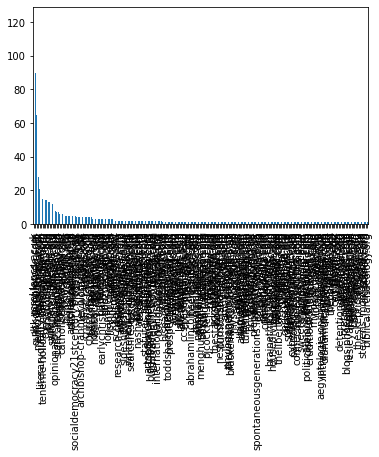

In [43]:
df["domain"].value_counts().plot(kind="bar")

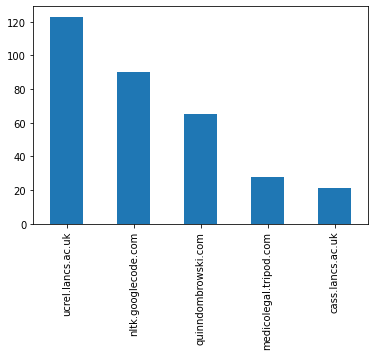

In [44]:
df["domain"].value_counts().head().plot(kind="bar")

In [45]:
pd.read_csv("data/frequencies_intensifiers.csv")

,"1;""completely different"";""672"";"""""
0,"2;""entirely different"";""386"";"""""
1,"3;""entirely new"";""334"";"""""
2,"4;""totally different"";""282"";"""""
3,"5;""completely new"";""261"";"""""
4,"6;""completely free"";""147"";"""""
...,...
2844,"2846;""entirely relative"";""1"";"""""
2845,"2847;""completely brown"";""1"";"""""
2846,"2848;""completely literate"";""1"";"""""
2847,"2849;""totally boneheaded"";""1"";"""""


In [46]:
pd.read_csv?

In [47]:
pd.read_csv(
    "data/frequencies_intensifiers.csv",
    sep=";",
    header=None,
    names=["rank", "collocation", "freq", "empty"]
)

,rank,collocation,freq,empty
0,1,completely different,672,NaN
1,2,entirely different,386,NaN
2,3,entirely new,334,NaN
3,4,totally different,282,NaN
4,5,completely new,261,NaN
...,...,...,...,...
2845,2846,entirely relative,1,NaN
2846,2847,completely brown,1,NaN
2847,2848,completely literate,1,NaN
2848,2849,totally boneheaded,1,NaN


If you want to go in the other direction and store `DataFrame`s on disk
as Excel spreadsheets, CSV files or many other formats, check out the
methods starting with `to_*` on `DataFrame` objects (remember you can
use `Tab` in JupyterLab to bring up a completion menu if you start
typing just `to_`).

`pandas` is an impressively featureful library and we've barely
scratched the surface of what you can do with it. It has also only
fairly recently hit 1.0 status, which means a lot of polish has been
applied to its website and documentation. Previously, the documentation,
though extensive and complete, was somewhat hard to navigate; this has
gotten much better. For more information, I suggest reviewing the
library's [*Getting
started*](https://pandas.pydata.org/docs/getting_started/index.html),
which contains a [list of practical
tasks](https://pandas.pydata.org/docs/getting_started/index.html#intro-to-pandas)
you might want to use `pandas` for along with recipes telling you how to
achieve that.

## The `csv` module in the standard library

The Python standard library also comes with a [`csv`
module](https://docs.python.org/3/library/csv.html). This is useful when
you don't have the option to install `pandas`, or when you don't really
need to work with the CSV file as a table, you just need to pull out
some values and put them in a dictionary for instance. In that case,
`pandas` may be an unnecessarily heavy dependency (as a Swiss Army knife
for data manipulation, it's pretty hefty), not to mention that loading
the entire table into memory at once might be wasteful, especially if
it's large and you just want one or two columns.

Let's first take a peek at the contents of a CSV file. As mentioned,
it's basically just a plain text file. This particular CSV file contains
a frequency distribution of *intensifier + adverb* combinations.

In [48]:
with open("data/frequencies_intensifiers.csv", encoding="utf-8") as file:
    for line in file:
        print(line)
        break

"1";"completely  different";"672";""



In [49]:
import csv

In [50]:
with open("data/frequencies_intensifiers.csv", encoding="utf-8") as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)
        break

['1;"completely  different";"672";""']


In [51]:
row

['1;"completely  different";"672";""']

In [52]:
len(row)

1

In [53]:
csv.reader?

In [54]:
with open("data/frequencies_intensifiers.csv", encoding="utf-8") as file:
    reader = csv.reader(file, delimiter=";")
    for row in reader:
        print(row)
        break

['1', 'completely  different', '672', '']


In [55]:
len(row)

4

In [56]:
int("4")

4

In [57]:
float("4.5")

4.5

In [58]:
row[1]

'completely  different'

In [59]:
row[1].split()

['completely', 'different']

In [60]:
adv, adj = row[1].split()

Let's divide up the adjectives into sets based on which intensifiers
they co-occur.

In [61]:
completely = set()
totally = set()
entirely = set()
utterly = set()

with open("data/frequencies_intensifiers.csv", encoding="utf-8") as file:
    reader = csv.reader(file, delimiter=";")
    for row in reader:
        adv, adj = row[1].split()
        if adv == "completely":
            completely.add(adj)
        elif adv == "totally":
            totally.add(adj)
        elif adv == "entirely":
            entirely.add(adj)
        elif adv == "utterly":
            utterly.add(adj)
        else:
            print("unexpected adverb:", adv)

By using set operations, we can now figure out which intensifiers tend
(not) to co-occur with which adjectives.

In [62]:
not_utterly = completely | totally | entirely
# or: not_utterly = completely.union(totally).union(entirely)

In [63]:
utterly - not_utterly
# or: utterly.difference(not_utterly)

{'appalling',
 'arresting',
 'bigoted',
 'blasphemous',
 'blasphomous',
 'cack-handed',
 'childish',
 'clever',
 'conditional',
 'contemptible',
 'crippling',
 'damnable',
 'defective',
 'degrading',
 'depraved',
 'despicable',
 'detestable',
 'devoted',
 'digestible',
 'disappointing',
 'disconsolate',
 'disgraceful',
 'dismal',
 'disposable',
 'distasteful',
 'distinguished',
 'disturbing',
 'downcast',
 'dreadful',
 'earthy',
 'effeminate',
 'endless',
 'energetic',
 'enraged',
 'exquisite',
 'extraordinary',
 'fatuous',
 'fluid',
 'forgettable',
 'fragile',
 'geeky',
 'graceful',
 'gracious',
 'guileless',
 'heartbreaking',
 'hopeful',
 'hysterical',
 'impassioned',
 'important',
 'impoverished',
 'indistinguishable',
 'indivisible',
 'infrequent',
 'lawless',
 'materialistic',
 'minuscule',
 'non-essential',
 'nugatory',
 'obscene',
 'obtuse',
 'one-of-a-kind',
 'orthodox',
 'paltry',
 'partisan',
 'passé',
 'pathological',
 'perverse',
 'phenomenal',
 'praiseworthy',
 'prepared',

# Storing objects on disk and reloading them

Some values take a long time to compute, so you don't want to have to
compute them again and again each time you close and reopen JupyterLab.
Instead, you'd like to compute them once, store them somewhere, and
reload them (almost) instantaneously whenever you need.

## The `%store` magic function

The `%store` magic function can store individual variables; it's perhaps
the simplest option, but you don't really control where the object gets
stored.

In [64]:
a = 2

In [65]:
%store a

Stored 'a' (int)


In [66]:
a = 3
a

3

Reload the stored value of the `a` variable:

In [67]:
%store -r a

In [68]:
a

2

For more information, consult `%store`'s docstring.

In [69]:
?%store

## The `json` standard library module

The standard library [`json`
module](https://docs.python.org/3/library/json.html) can also be used
for this purpose.

In [70]:
import json

JSON [serialization](https://en.wikipedia.org/wiki/Serialization)
actually results in plain text, which is nice and mostly human readable,
if it's pretty-printed. It looks close to how the same data structure
is written down in Python (can you spot the differences?).

In [71]:
person = {
    "name": "John Doe",
    "age": 31,
    "interests": ["Python", "linguistics"],
    "single": False,
    "pet": None,
}
print(json.dumps(person, indent=2))

{
  "name": "John Doe",
  "age": 31,
  "interests": [
    "Python",
    "linguistics"
  ],
  "single": false,
  "pet": null
}


When writing to disk, you get to pick where the object is stored, at the
expense of having to type more than with `%store`. The `"w"` argument
sets the mode of the open file to *write* (the `"r"` mode for *reading*
is the default, so we didn't need to set it explicitly before when
reading files).

In [72]:
with open("person.json", "w") as file:
    json.dump(person, file, indent=2)

In [73]:
%cat person.json

{
  "name": "John Doe",
  "age": 31,
  "interests": [
    "Python",
    "linguistics"
  ],
  "single": false,
  "pet": null
}

In [74]:
with open("person.json") as file:
    data = json.load(file)
data

{'name': 'John Doe',
 'age': 31,
 'interests': ['Python', 'linguistics'],
 'single': False,
 'pet': None}

In [75]:
# cleanup
%rm person.json

If you want to store multiple objects like this, just put them in a
dictionary and `json.dump` the whole thing.

JSON was created as an interchange format, which comes both with
advantages and a drawbacks. The advantage is it can be easily loaded
into different languages / tools, almost every programming language now
has an easily accessible JSON library. The main drawback is that it only
works for storing a limited range of types: dicts, lists, strings,
numbers, Boolean values (`True` and `False`) and `None`. As an
interchange format, it makes sense that it has to stick to the lowest
common denominator of what's available in some form in almost every
programming language, otherwise there couldn't be much interchange.
Some additional types can be stored as JSON, but only by being converted
to one of the above -- e.g. if you store a tuple in JSON and load it
back, it will become a list.

In [76]:
json.loads(json.dumps((1, 2, 3)))

[1, 2, 3]

## The `pickle` standard library module

[Pickling objects](https://docs.python.org/3/library/pickle.html) works
in a very similar way to dumping them as JSON, just make sure to open
the file for writing **in binary mode** (`"wb"`):

In [77]:
import pickle

with open("person.pickle", "wb") as file:
    pickle.dump(person, file)

... and for reading as well (`"rb"`):

In [78]:
with open("person.pickle", "rb") as file:
    data = pickle.load(file)
data

{'name': 'John Doe',
 'age': 31,
 'interests': ['Python', 'linguistics'],
 'single': False,
 'pet': None}

This is because pickling doesn't use a plain text format, but a custom
binary format.

In [79]:
%cat person.pickle

�}q (X   nameqX   John DoeqX   ageqKX	   interestsq]q(X   PythonqX   linguisticsqeX   singleq�X   petq	Nu.

In [80]:
# cleanup
%rm person.pickle

The advantage of `pickle` is that unlike JSON, it can faithfully
preserve a much wider spectrum of Python objects (most things you're
likely to need in normal practice). This flexibility is partially
achieved by allowing arbitrary code to run during unpickling, based on
what's stored in the pickle, which is a security flaw -- someone could
in theory send you a maliciously crafted pickle which deletes your home
directory upon unpickling. **So only unpickle data from sources you
trust.**

Another disadvantage is that the format is specific to Python, and it
can even change between versions of the language: there are [several
versions of the pickle
protocol](https://docs.python.org/3/library/pickle.html#data-stream-format),
as it gets improved over time. This means that if you want to share
pickled objects across Python versions, you need to be careful about
which protocol version you use in order to retain backwards
compatibility.

Like with JSON, if you want to pickle multiple objects, you still have
to store them separately, or put them all in a dict manually and store
the dict.

## The `dill` library

[`dill`](https://dill.readthedocs.io) is `pickle` on steroids. For any
less proficient English speakers reading and/or those without a
background in English literature, the name is a pun on [dill
pickle](https://www.google.com/search?client=q=dill+pickle), or maybe
even [*A Dill Pickle*](https://en.wikipedia.org/wiki/A_Dill_Pickle).
Its biggest advantage is that it can pickle entire sessions (kind of
like R does, if you're familiar with R), you don't have to specify
objects one by one. Before we demonstrate this though, we'll need to get
rid of our CSV `reader` object from before, because it turns out that's
one of the objects which can't be even dill-pickled. (You don't have to
remember this by heart, I certainly don't -- Python will complain loudly
if you try to pickle something that can't be pickled.)

In [81]:
import dill

del reader
dill.dump_session("session.pickle")

In [82]:
dill.load_session("session.pickle")
# cleanup
%rm session.pickle

Apart from the advantages of being able to pickle entire sessions,
`dill` also extends pickling support to more types of objects. You can
just switch your code to using `dill.dump()` / `dill.load()` instead of
`pickle.dump()` / `pickle.load()` and you get this extended support for
free.

The disadvantages are the same as for `pickle`, plus it's not bundled
with Python, so it's another dependency you have to [install it
separately](https://pypi.org/project/dill/).